## AirBnB Size and Style Comparison ##

#### Analysis of AirBnBs Based on Size

- The most relevant metric by which to judge the size of an AirBnB is Capacity as opposed to Bed Count or Bedroom Count because alternative sleeping   spaces that may increase a unit's capacity, such as couches, are not considered "beds" and do not increase bed or bedroom counts. The most common capacity of AirBnBs in New York City is 2 people and the least common capacity is tied between 13 and 14 people. Even when split by neighborhood the most common capacity is 2 people.

- While the relationship between unit price and unit capacity is positive, as expected, the r-value and relatively large variance does not prove for a very strong correlation. Unit price is likely more affected by the unit's proximity to popular attractions.

- The most common property type is an entire rental unit followed by a private room in rental unit. 

In [61]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import scipy.stats as st

# Store filepath in a variable
file = Path("Resources/NewYorkAirBnB.csv")
file_df = pd.read_csv(file)
file_df


,Unnamed: 0,id,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,801749842377802394,495455523,Michael,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,...,1.0,$143.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,765948794133787266,488760226,Eric,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,...,1.0,$30.00,13,4.85,4.77,4.77,4.85,4.92,4.85,4.92
2,2,636274456676328779,461263600,Tommaso,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,...,2.0,$157.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,768125251187660469,475699129,Suliman,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,...,1.0,$89.00,15,5.00,5.00,4.87,5.00,5.00,5.00,5.00
4,4,49248255,397288055,Katherine,North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,...,2.0,$125.00,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,42926,40342902,90429772,Hanna,East Village,Manhattan,40.726110,-73.988010,Private room in rental unit,Private room,...,1.0,$85.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42927,42927,35257699,264962468,Mili,Hell's Kitchen,Manhattan,40.762150,-73.990270,Entire rental unit,Entire home/apt,...,3.0,$208.00,217,4.48,4.58,4.41,4.65,4.75,4.91,4.51
42928,42928,52491515,305489297,Stavros,Lower East Side,Manhattan,40.717330,-73.991110,Entire rental unit,Entire home/apt,...,3.0,$125.00,7,4.43,4.43,3.29,4.86,4.86,5.00,4.14
42929,42929,48158801,6600525,Quentin,Bushwick,Brooklyn,40.687350,-73.917660,Private room in loft,Private room,...,1.0,$50.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Copy and clean initial df for size comparisons
size_df = file_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "bathrooms_text",
                   "bedrooms", "beds", "price", "number_of_reviews", "review_scores_rating"]].copy()

# Split bathroom data to enable use as int, get rid of extra columns
size_df[["baths", "shared", "bath"]] = size_df.bathrooms_text.str.split(" ", expand=True)
size_df["baths"] = size_df["baths"].replace("Half-bath", "0.5")
size_df["baths"] = size_df["baths"].replace("Private", "0.5")
size_df["baths"] = size_df["baths"].replace("Shared", "0.5")

size_df["baths"] = size_df["baths"].astype(float)
size_df = size_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "baths", "bedrooms",
                   "beds", "price", "number_of_reviews", "review_scores_rating"]]

size_df.columns = ["ID", "Host ID", "Neighborhood", "Borough", "Property Type", "Room Type", "Capacity", "Baths", "Bedrooms",
                        "Beds", "Price", "Number of Reviews", "Overall Review Score"]
size_df

,ID,Host ID,Neighborhood,Borough,Property Type,Room Type,Capacity,Baths,Bedrooms,Beds,Price,Number of Reviews,Overall Review Score
0,801749842377802394,495455523,Canarsie,Brooklyn,Private room in home,Private room,2,1.0,1.0,1.0,$143.00,0,NaN
1,765948794133787266,488760226,Canarsie,Brooklyn,Private room in rental unit,Private room,1,1.0,1.0,1.0,$30.00,13,4.85
2,636274456676328779,461263600,Tottenville,Staten Island,Entire villa,Entire home/apt,6,2.0,2.0,2.0,$157.00,0,NaN
3,768125251187660469,475699129,Sheepshead Bay,Brooklyn,Private room in home,Private room,2,2.0,3.0,1.0,$89.00,15,5.00
4,49248255,397288055,North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1.0,2.0,2.0,$125.00,25,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,40342902,90429772,East Village,Manhattan,Private room in rental unit,Private room,1,1.0,1.0,1.0,$85.00,0,NaN
42927,35257699,264962468,Hell's Kitchen,Manhattan,Entire rental unit,Entire home/apt,6,1.0,2.0,3.0,$208.00,217,4.48
42928,52491515,305489297,Lower East Side,Manhattan,Entire rental unit,Entire home/apt,3,1.0,3.0,3.0,$125.00,7,4.43
42929,48158801,6600525,Bushwick,Brooklyn,Private room in loft,Private room,1,2.0,6.0,1.0,$50.00,0,NaN


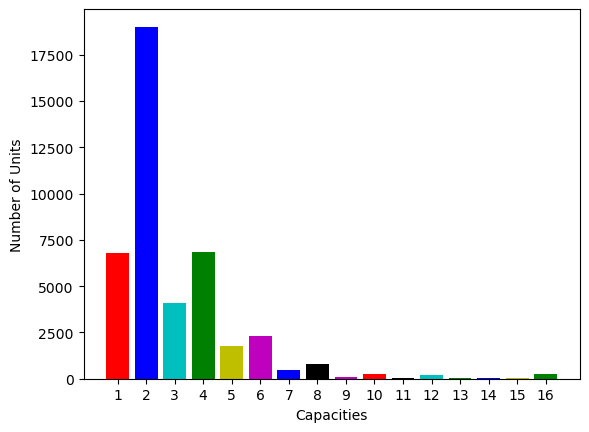

In [63]:
# Bar Graph showing Capacity of AirBnBs vs. Number of Units
#size_df["Capacity"].value_counts().plot(kind="bar")
cap_counts_df = size_df[size_df["Capacity"] > 0]
cap_counts = cap_counts_df["Capacity"].value_counts()
cap_list = cap_counts.index.tolist()
colors = ['b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']

plt.bar(cap_list, cap_counts, color=colors)
plt.xlabel("Capacities")
plt.ylabel("Number of Units")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 
           ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"])
# Save the figure
plt.savefig("output_data/AllCapacitiesBar.png")

plt.show()

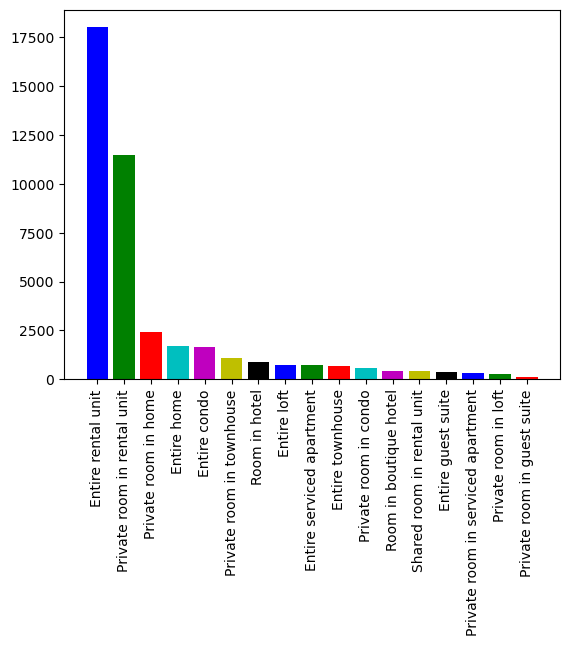

In [64]:
# Bar Graph showing Property Type of AirBnBs vs. Number of Units
type_counts = size_df["Property Type"].value_counts()
# Set limit to more popular property types
type_counts = type_counts[type_counts > 100]
type_list = type_counts.index.tolist()
plt.bar(type_list, type_counts, color=colors)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("output_data/AllTypesBar.png")

plt.show()

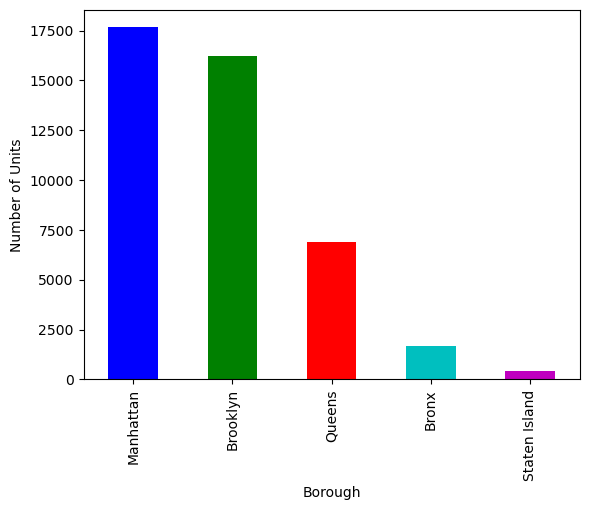

In [65]:
# Bar graph Boroughs vs. Number of Units
size_df["Borough"].value_counts().plot(kind="bar", color=colors)
plt.xlabel("Borough")
plt.ylabel("Number of Units")

# Save the figure
plt.savefig("output_data/BoroughTotalsBar.png")

plt.show()


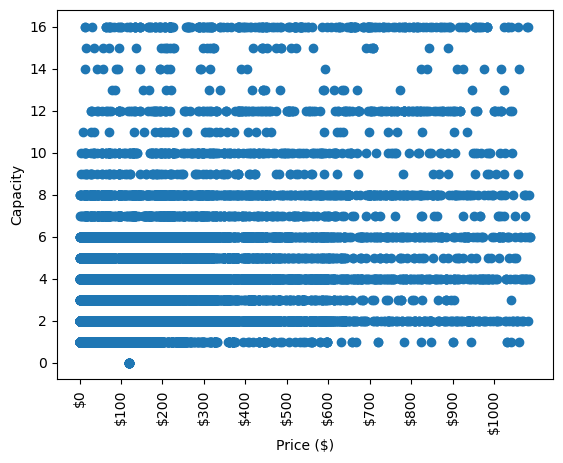

In [66]:
# Scatter Plot showing Prices of All Units vs. Capacity of All Units
x = size_df["Price"]
y = size_df["Capacity"]
plt.scatter(x,y)

plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
           ["$0", "$100", '$200', '$300', '$400', '$500', '$600', '$700', '$800', '$900', '$1000'], 
           rotation=90)

plt.show()

In [67]:
# Each unit capacity and their total values
cap_counts = size_df["Capacity"].value_counts()
cap_counts


2     19015
4      6835
1      6775
3      4083
6      2287
5      1769
8       790
7       464
16      246
10      234
12      203
9        95
15       37
11       36
13       23
14       23
0        16
Name: Capacity, dtype: int64

In [68]:
# Each unit property type and their total values
type_counts = size_df["Property Type"].value_counts()
type_counts

Entire rental unit                  18010
Private room in rental unit         11493
Private room in home                 2396
Entire home                          1727
Entire condo                         1645
                                    ...  
Shared room in bed and breakfast        1
Private room in kezhan                  1
Private room in floor                   1
Entire bed and breakfast                1
Private room in dorm                    1
Name: Property Type, Length: 80, dtype: int64

In [69]:
# Price summary stats dataframe by borough
size_df["Price"] = size_df["Price"].str.replace("$", "")
size_df["Price"] = size_df["Price"].str.replace(",", "")
size_df["Price"] = size_df["Price"].astype(float)

borough_mean = size_df.groupby(["Borough"]).mean(numeric_only=True)
borough_med = size_df.groupby(["Borough"]).median(numeric_only=True)
borough_var = size_df.groupby(["Borough"]).var(numeric_only=True)
borough_std = size_df.groupby(["Borough"]).std(numeric_only=True)
borough_sem = size_df.groupby(["Borough"]).sem(numeric_only=True)

borough_stats = pd.DataFrame({"Mean Price":borough_mean["Price"], "Median Price":borough_med["Price"], "Price Variance":borough_var["Price"],
                                "Price Std Dev":borough_std["Price"], "Price Std Err":borough_sem["Price"]})

borough_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_16932\1396221645.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  size_df["Price"] = size_df["Price"].str.replace("$", "")


,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Borough,,,,,
Bronx,117.512123,87.0,6.906956e+04,262.810878,6.391040
Brooklyn,162.766829,110.0,1.088101e+06,1043.120669,8.186187
Manhattan,268.365783,165.0,6.517626e+05,807.318180,6.075387
Queens,128.173655,90.0,9.470758e+04,307.745972,3.700538
Staten Island,309.037296,99.0,1.002534e+07,3166.281483,152.869511


In [70]:
# Put boroughs into a list for for loop (and later for plot labels)
five_boroughs = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

# Create empty list to fill with borough data (for plotting)
borough_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for borough in five_boroughs:

    df1 = size_df.loc[size_df["Borough"] == borough]
    capacity_df = df1.loc[df1["Capacity"] == df1["Capacity"]]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    price_by_borough = df1["Price"]
    
    # add subset 
    borough_data.append(price_by_borough)
    
    # Determine outliers using upper and lower bounds
    quartiles = price_by_borough.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #outliers = outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    outliers = (price_by_borough.loc[(df1['Price'] >= upper_bound) | 
                                        (df1['Price'] <= lower_bound)])
    
    print(f"{borough}'s potential outliers: {outliers}")
    print(f"{borough}'s upper bound = {upper_bound}")
    print(f"{borough}'s lower bound = {lower_bound}")


Bronx's potential outliers: 18       301.0
279      300.0
300      500.0
307      500.0
321      267.0
         ...  
38620    300.0
41032    259.0
41616    250.0
42282    250.0
42913    650.0
Name: Price, Length: 106, dtype: float64
Bronx's upper bound = 245.5
Bronx's lower bound = -54.5
Brooklyn's potential outliers: 147       444.0
304      3600.0
603       375.0
606       500.0
609       770.0
          ...  
42716     754.0
42769     450.0
42810     360.0
42846     595.0
42907     375.0
Name: Price, Length: 935, dtype: float64
Brooklyn's upper bound = 348.5
Brooklyn's lower bound = -103.5
Manhattan's potential outliers: 704      5065.0
716      1400.0
750      2000.0
973      1800.0
1002      550.0
          ...  
42889     600.0
42892    1271.0
42897    1800.0
42899     600.0
42920     857.0
Name: Price, Length: 1380, dtype: float64
Manhattan's upper bound = 528.5
Manhattan's lower bound = -155.5
Queens's potential outliers: 10       975.0
15       380.0
30       280.0
49       3

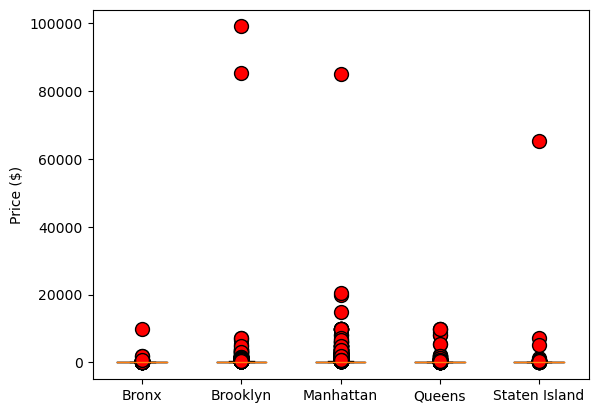

In [71]:
# Box plot showing prices of units across different boroughs
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)

plt.boxplot(borough_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4, 5], ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
plt.ylabel("Price ($)")
plt.show()

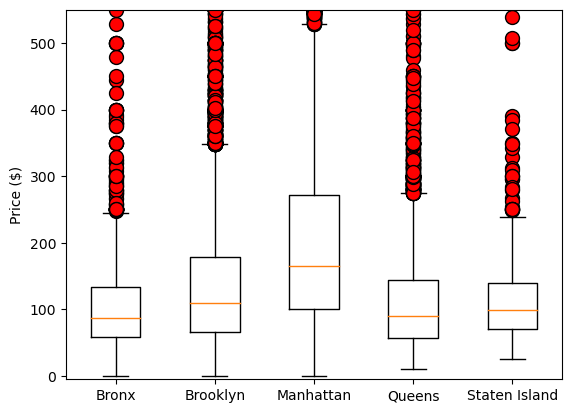

In [72]:
# Box plot showing prices of units across boroughs where y-axis is limited at $550 based on earlier calculation of outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)

plt.boxplot(borough_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4, 5], ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
plt.ylabel("Price ($)")
plt.ylim(-5,550)

# Save the figure
plt.savefig("output_data/BoroughPriceBox.png")

plt.show()


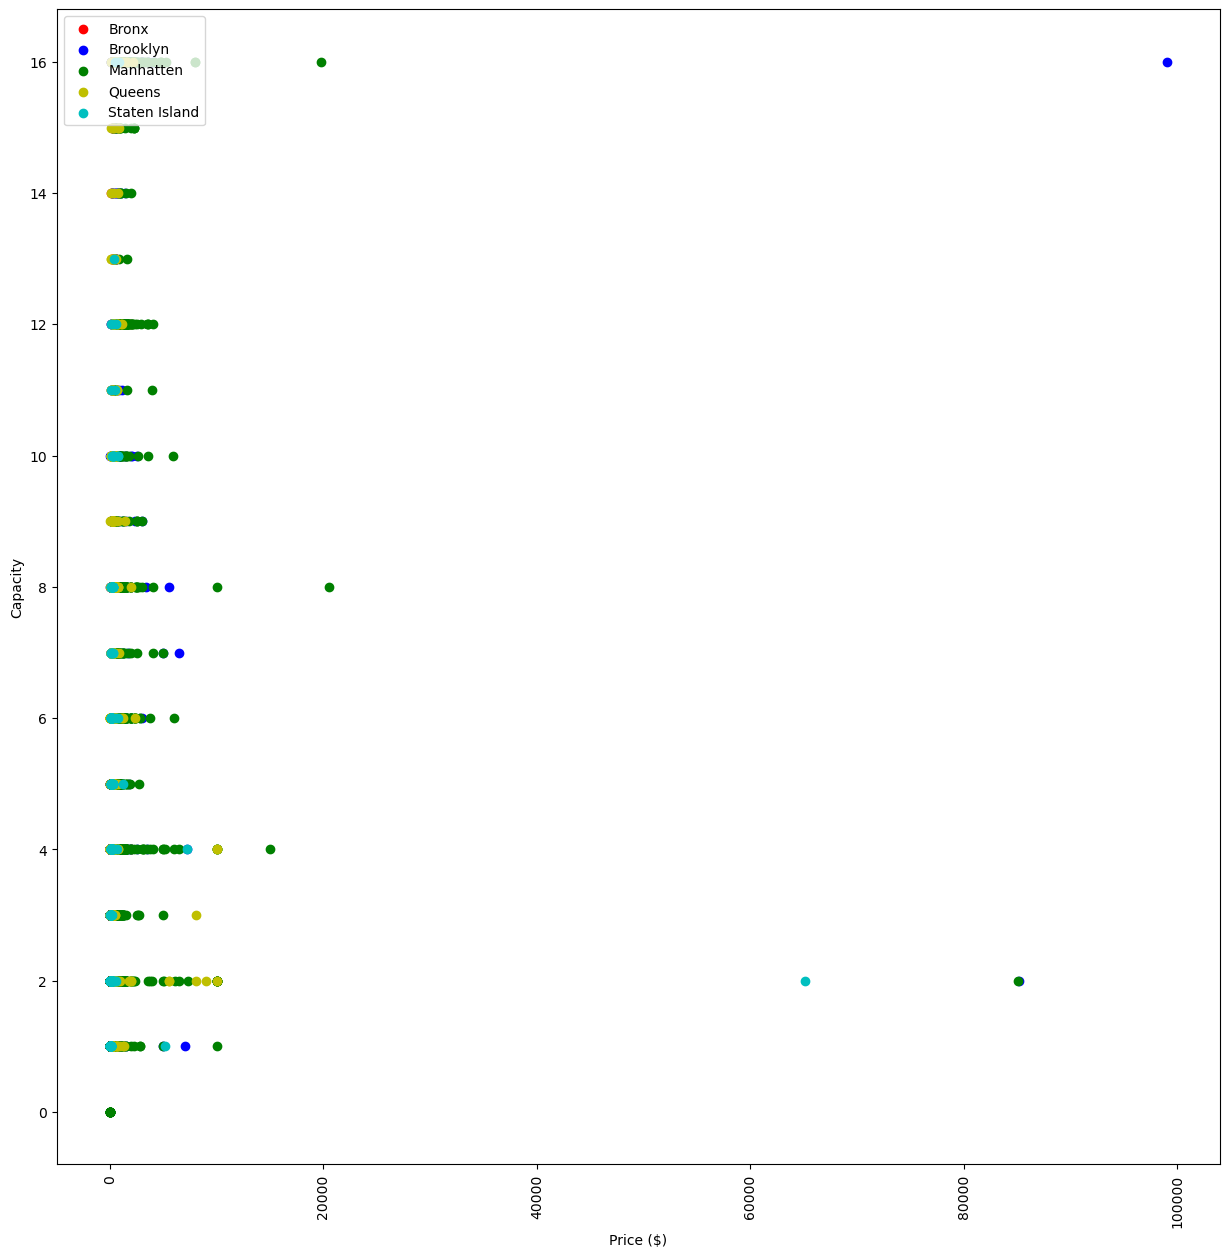

In [73]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs
bronx_df = size_df[(size_df["Borough"] == "Bronx")]
brooklyn_df = size_df[(size_df["Borough"] == "Brooklyn")]
manhattan_df = size_df[(size_df["Borough"] == "Manhattan")]
queens_df = size_df[(size_df["Borough"] == "Queens")]
staten_df = size_df[(size_df["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")

plt.show()


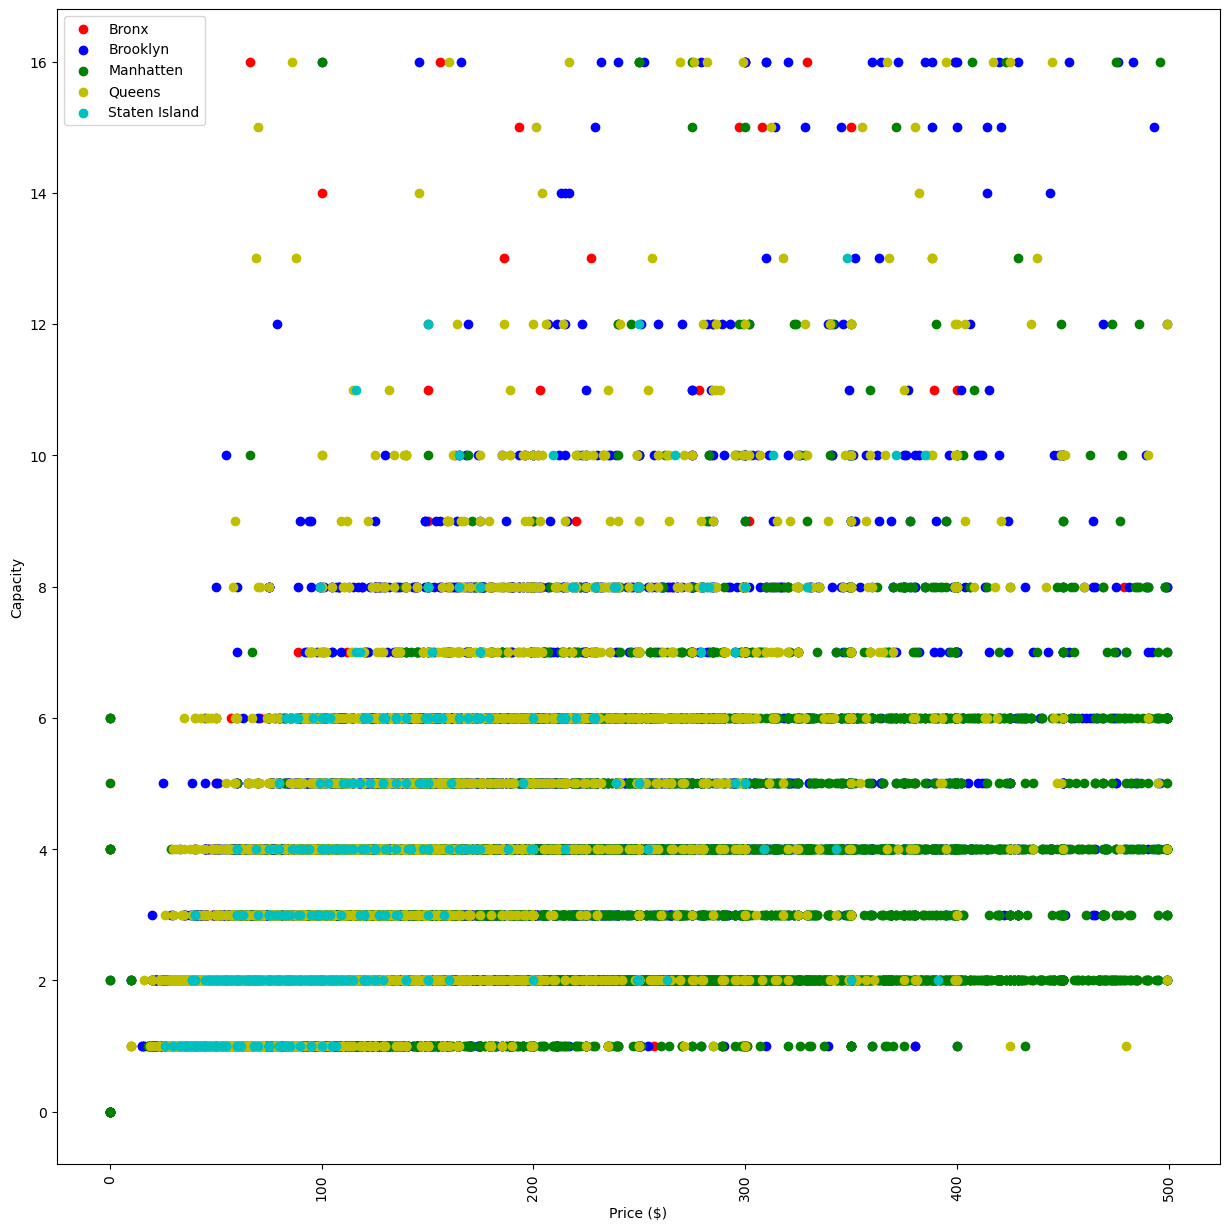

In [74]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs with price limited at $550
size_no_outliers = size_df[size_df["Price"] < 500]

bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")

# Save the figure
plt.savefig("output_data/BoroughPrice_CapScatter.png")

plt.show()

The coorelation between price and capactiy is 0.6


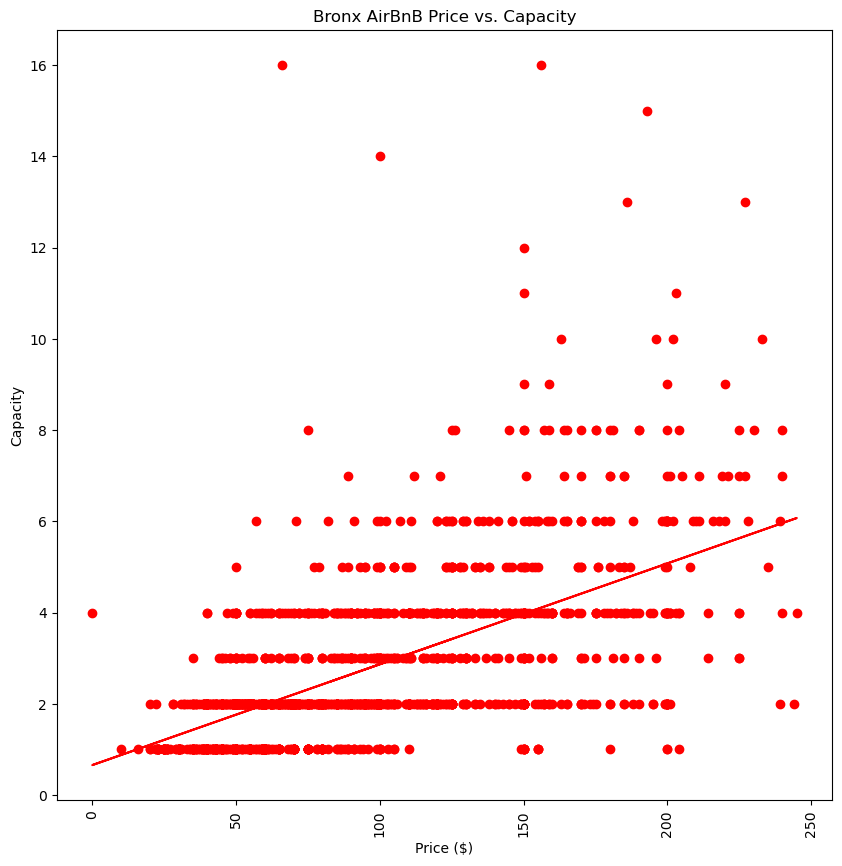

In [75]:
# Scatter plot of Price vs. Capacity in the Bronx where priced is capped at $245.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] <= 245.5]
bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(bronx_x, bronx_y, color="r")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.title("Bronx AirBnB Price vs. Capacity")

x = bronx_x
y = bronx_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

# Save the figure
plt.savefig("output_data/BronxScatter.png")

plt.show()

In [76]:
# Summary stats dataframe of capacities by neighborhoods in the Bronx
bronx_df["Price"] = bronx_df["Price"].astype(float)

hood_mean = bronx_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = bronx_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = bronx_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = bronx_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = bronx_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_16932\1308786891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_df["Price"] = bronx_df["Price"].astype(float)


,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Allerton,3.306122,3.0,3.466837,1.861944,0.265992
Baychester,3.297297,2.0,3.659159,1.912893,0.314478
Belmont,2.761905,2.0,2.478513,1.574329,0.242924
Bronxdale,2.280000,2.0,1.460000,1.208305,0.241661
Castle Hill,3.875000,4.0,2.410714,1.552648,0.548944
City Island,2.833333,2.0,1.606061,1.267304,0.365839
Claremont Village,2.323529,2.0,2.528520,1.590132,0.272705
Clason Point,2.538462,2.0,1.939668,1.392720,0.193135
Co-op City,1.500000,1.5,0.333333,0.577350,0.288675


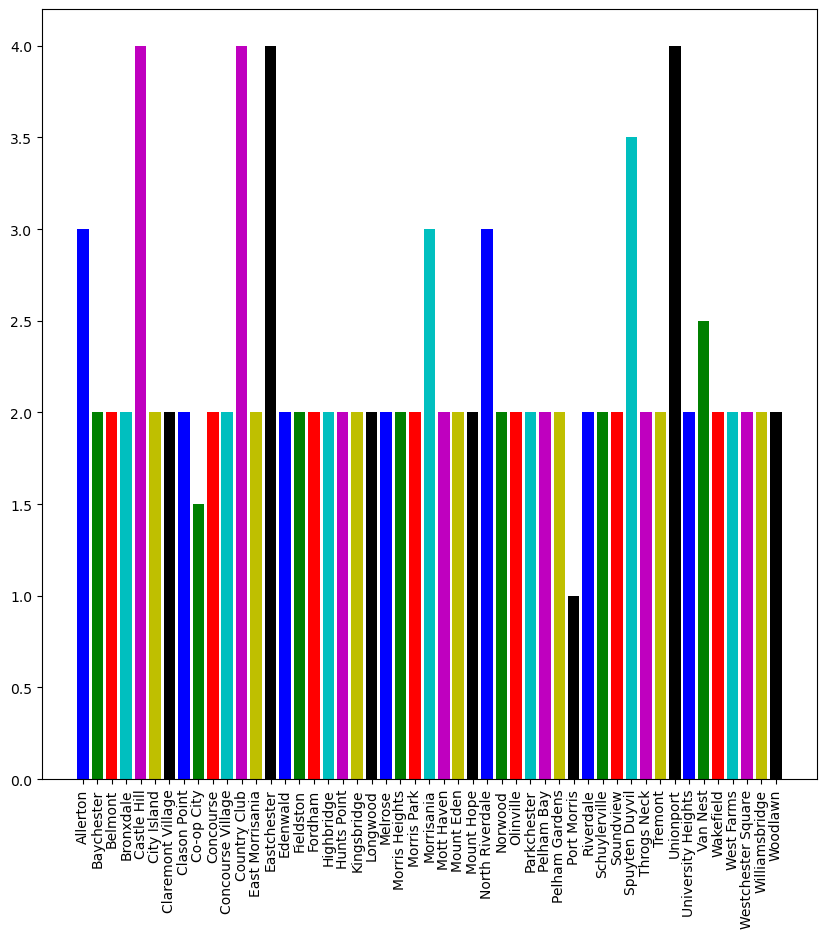

In [77]:
# Bar chart showing median unit capapcities by neighborhood in the Bronx
hood_list = hood_stats.index.unique()
plt.figure(figsize=(10,10))
plt.bar(hood_list, hood_stats["Median Capacity"], color=colors)
plt.xticks(rotation=90)

# Save the figure
#plt.savefig("output_data/BronxCapacitiesBar.png")

plt.show()

The coorelation between price and capactiy is 0.55


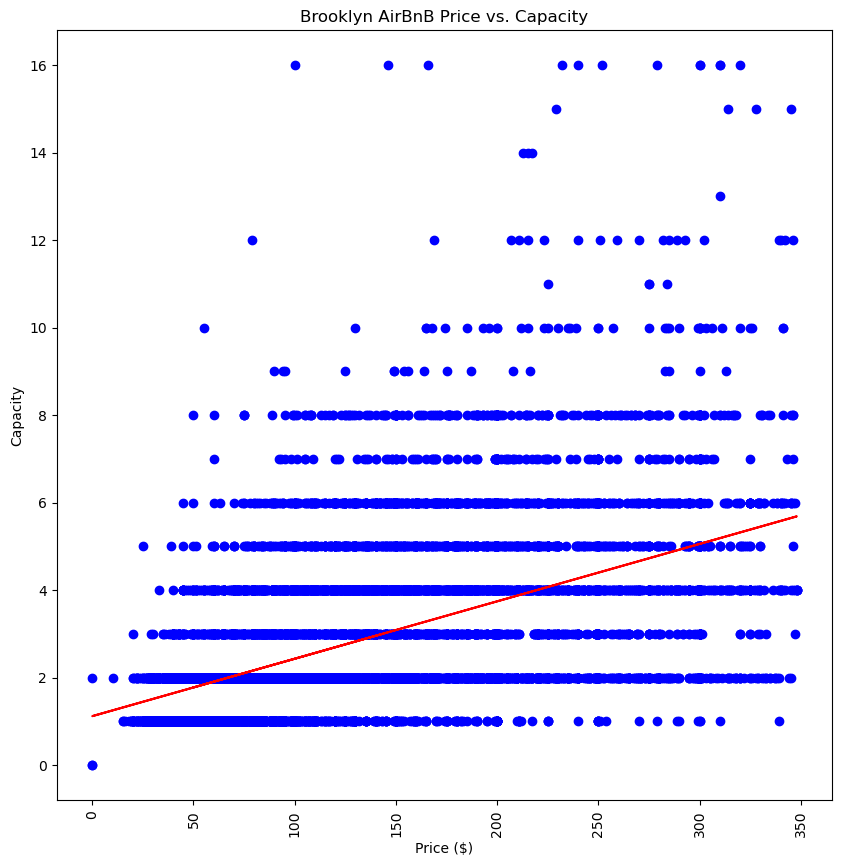

In [78]:
# Scatter plot of Price vs. Capacity in Brooklyn where priced is capped at $348.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] <= 348.5]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]

brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(brooklyn_x, brooklyn_y, color="b")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Brooklyn AirBnB Price vs. Capacity")

x = brooklyn_x
y = brooklyn_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

# Save the figure
plt.savefig("output_data/BrooklynScatter.png")

plt.show()

In [79]:
# Summary stats dataframe of capacities by neighborhoods in Brooklyn
brooklyn_df["Price"] = brooklyn_df["Price"].astype(float)

hood_mean = brooklyn_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = brooklyn_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = brooklyn_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = brooklyn_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = brooklyn_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_16932\2219010339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df["Price"] = brooklyn_df["Price"].astype(float)


,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Bath Beach,2.740741,2.0,1.891738,1.375405,0.264697
Bay Ridge,2.739726,2.0,5.973170,2.444007,0.202267
Bedford-Stuyvesant,2.712147,2.0,2.963402,1.721454,0.031754
Bensonhurst,2.987654,2.0,3.987346,1.996834,0.221870
Bergen Beach,4.450000,4.0,6.892105,2.625282,0.587031
Boerum Hill,2.763158,2.0,1.669073,1.291926,0.121000
Borough Park,2.307692,2.0,1.593162,1.262205,0.132315
Brighton Beach,2.500000,2.0,1.690141,1.300054,0.153213
Brooklyn Heights,2.518519,2.0,1.227778,1.108051,0.123117


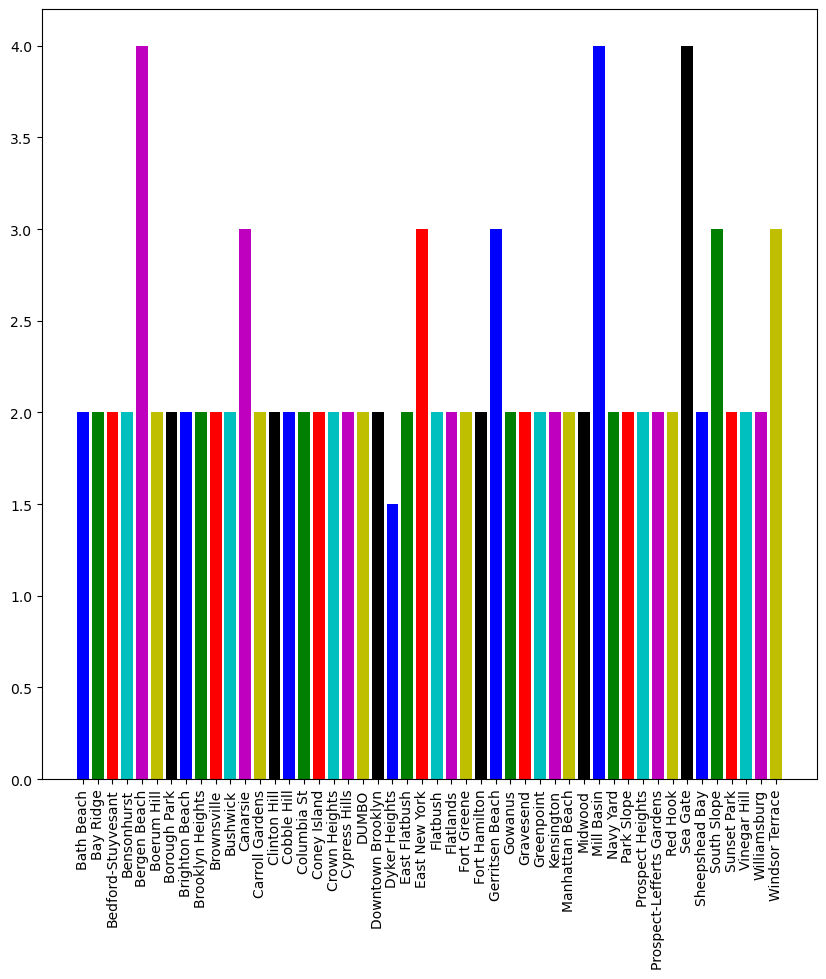

In [80]:
# Bar chart showing median unit capacities by neighborhood in Brooklyn

hood_list = hood_stats.index.unique()
plt.figure(figsize=(10,10))
plt.bar(hood_list, hood_stats["Median Capacity"], color=colors)
plt.xticks(rotation=90)

# Save the figure
#plt.savefig("output_data/BrooklynCapacitiesBar.png")

plt.show()

The coorelation between price and capactiy is 0.42


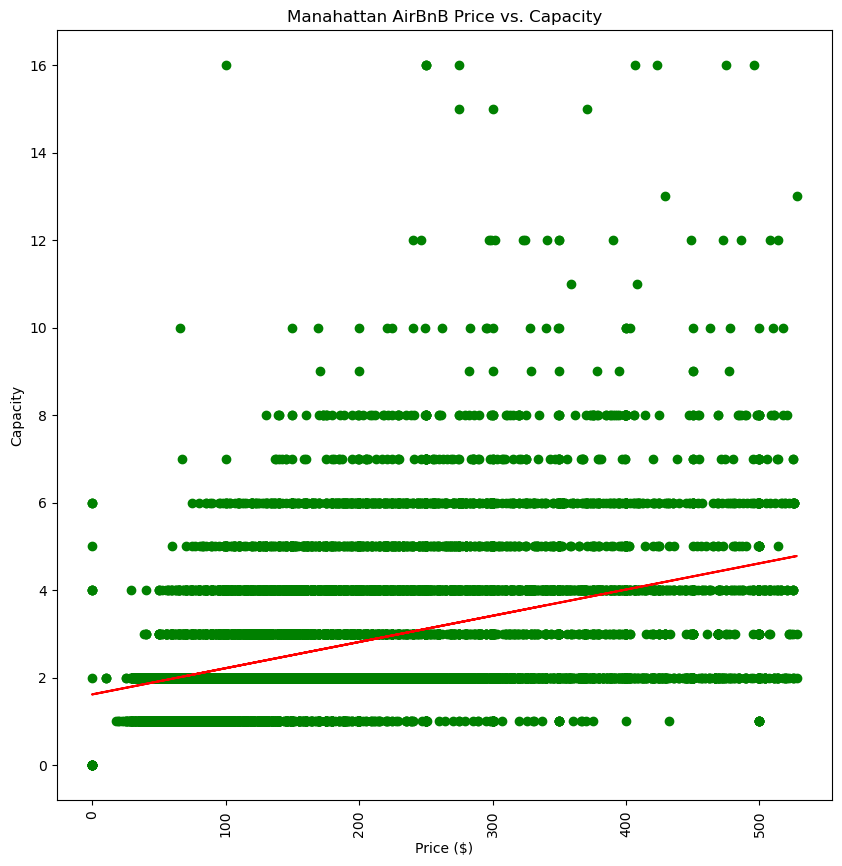

In [81]:
# Scatter plot of Price vs. Capacity in Manhattan where priced is capped at $528.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] <= 528.5]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]

manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(manhattan_x, manhattan_y, color="g")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Manahattan AirBnB Price vs. Capacity")

x = manhattan_x
y = manhattan_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

# Save the figure
plt.savefig("output_data/ManhattanScatter.png")

plt.show()

In [82]:
# Summary stats dataframe of capacities by neighborhoods in Manhattan
manhattan_df["Price"] = manhattan_df["Price"].astype(float)

hood_mean = manhattan_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = manhattan_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = manhattan_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = manhattan_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = manhattan_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_16932\1638623967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df["Price"] = manhattan_df["Price"].astype(float)


,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Battery Park City,2.783784,2.0,2.062199,1.436036,0.166936
Chelsea,2.536745,2.0,1.513103,1.230082,0.044561
Chinatown,2.502008,2.0,1.912294,1.382857,0.087635
Civic Center,2.896552,2.0,1.953202,1.397570,0.259522
East Harlem,2.813842,2.0,2.899593,1.702819,0.058823
East Village,2.478733,2.0,1.880209,1.371207,0.041250
Financial District,2.815739,2.0,1.862136,1.364601,0.059784
Flatiron District,2.451923,2.0,1.104462,1.050934,0.103053
Gramercy,2.495413,2.0,1.393988,1.180673,0.079965


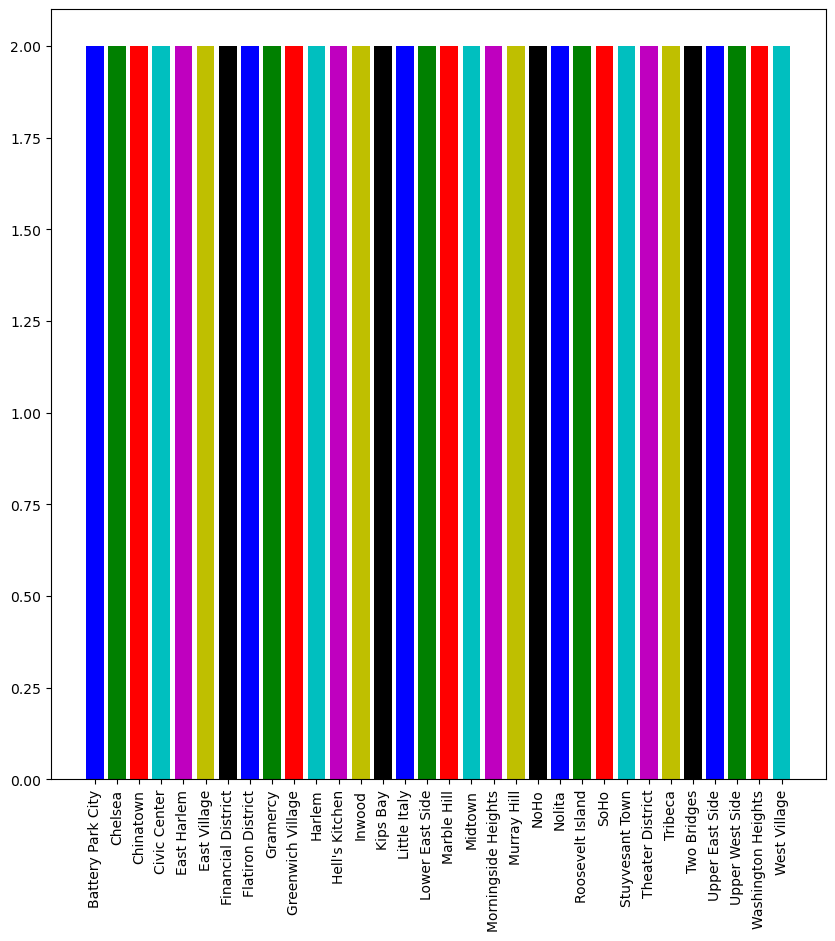

In [83]:
# Bar chart showing median unit capacities by neighborhood in Manhattan

hood_list = hood_stats.index.unique()
plt.figure(figsize=(10,10))
plt.bar(hood_list, hood_stats["Median Capacity"], color=colors)
plt.xticks(rotation=90)

# Save the figure
#plt.savefig("output_data/ManhattanCapacitiesBar.png")

plt.show()

The coorelation between price and capactiy is 0.61


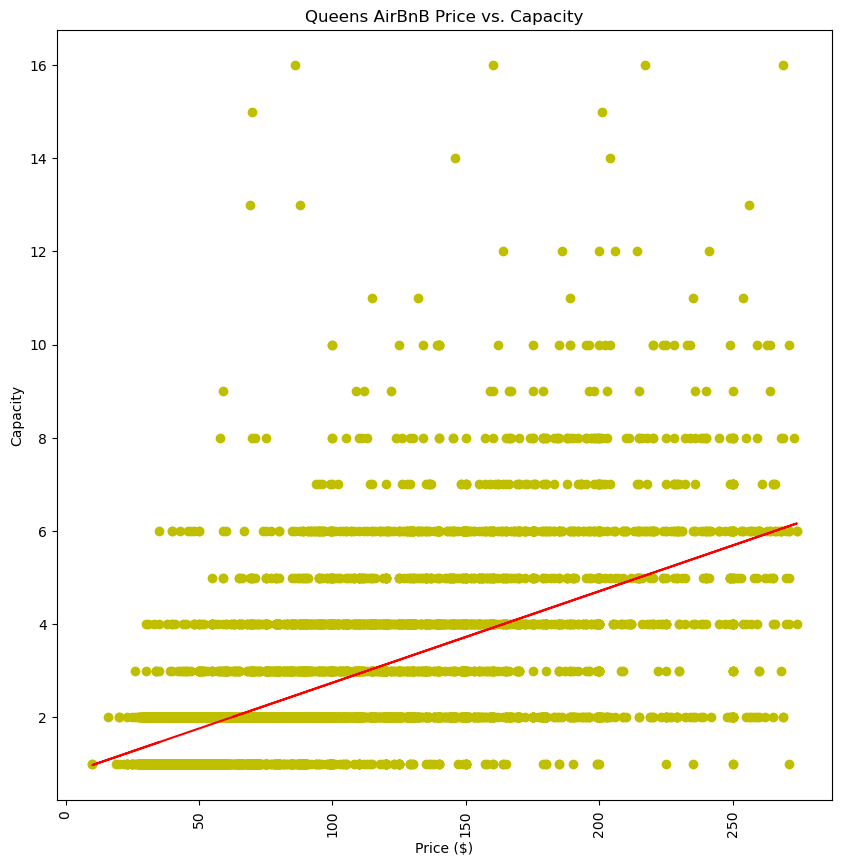

In [84]:
# Scatter plot of Price vs. Capacity in Queens where priced is capped at $274.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] <= 274.5]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]

queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(queens_x, queens_y, color="y")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Queens AirBnB Price vs. Capacity")

x = queens_x
y = queens_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

# Save the figure
plt.savefig("output_data/QueensxScatter.png")

plt.show()

In [85]:
# Summary stats dataframe of capacities by neighborhoods in Queens
queens_df["Price"] = queens_df["Price"].astype(float)

hood_mean = queens_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = queens_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = queens_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = queens_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = queens_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_16932\1689296819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens_df["Price"] = queens_df["Price"].astype(float)


,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Arverne,3.850000,4.0,5.542929,2.354343,0.235434
Astoria,2.416894,2.0,2.093357,1.446844,0.053404
Bay Terrace,3.600000,4.0,6.300000,2.509980,1.122497
Bayside,2.681818,2.0,3.543357,1.882381,0.231705
Bayswater,2.428571,2.0,2.357143,1.535299,0.335030
Belle Harbor,4.571429,4.0,4.952381,2.225395,0.841120
Bellerose,3.200000,3.0,2.589474,1.609184,0.359825
Breezy Point,2.000000,2.0,0.000000,0.000000,0.000000
Briarwood,2.742857,2.0,3.196639,1.787915,0.302213


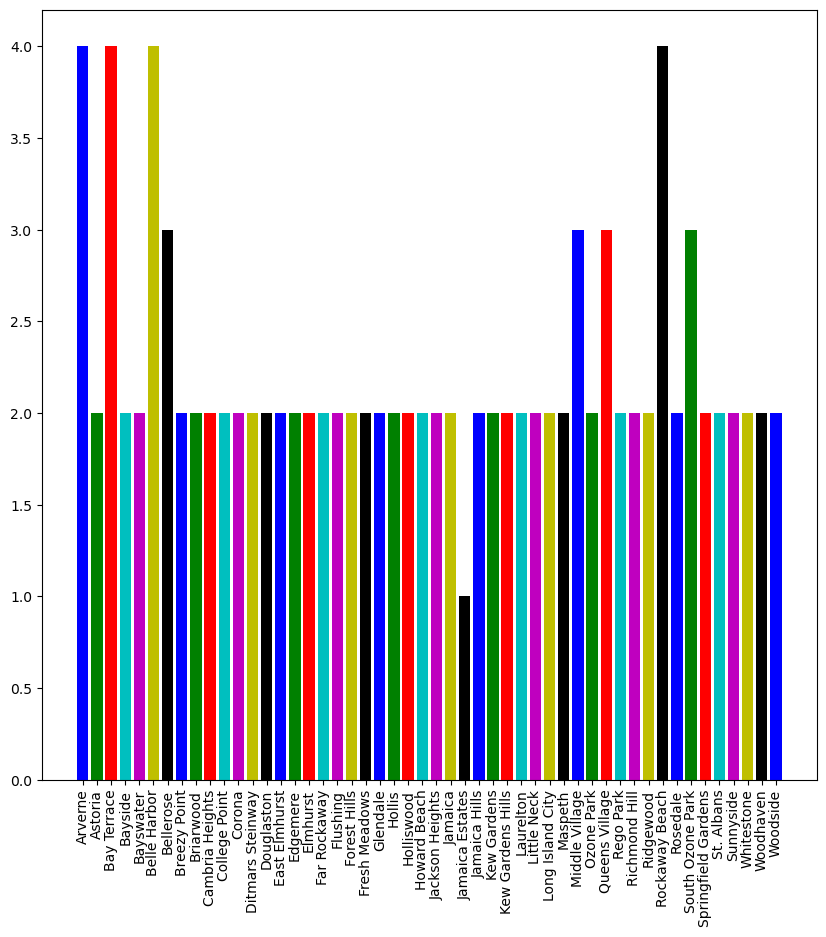

In [86]:
# Bar chart showing median unit capacities by neighborhood in Queens
hood_list = hood_stats.index.unique()
plt.figure(figsize=(10,10))
plt.bar(hood_list, hood_stats["Median Capacity"], color=colors)
plt.xticks(rotation=90)

# Save the figure
#plt.savefig("output_data/QueensCapacitiesBar.png")

plt.show()

The coorelation between price and capactiy is 0.7


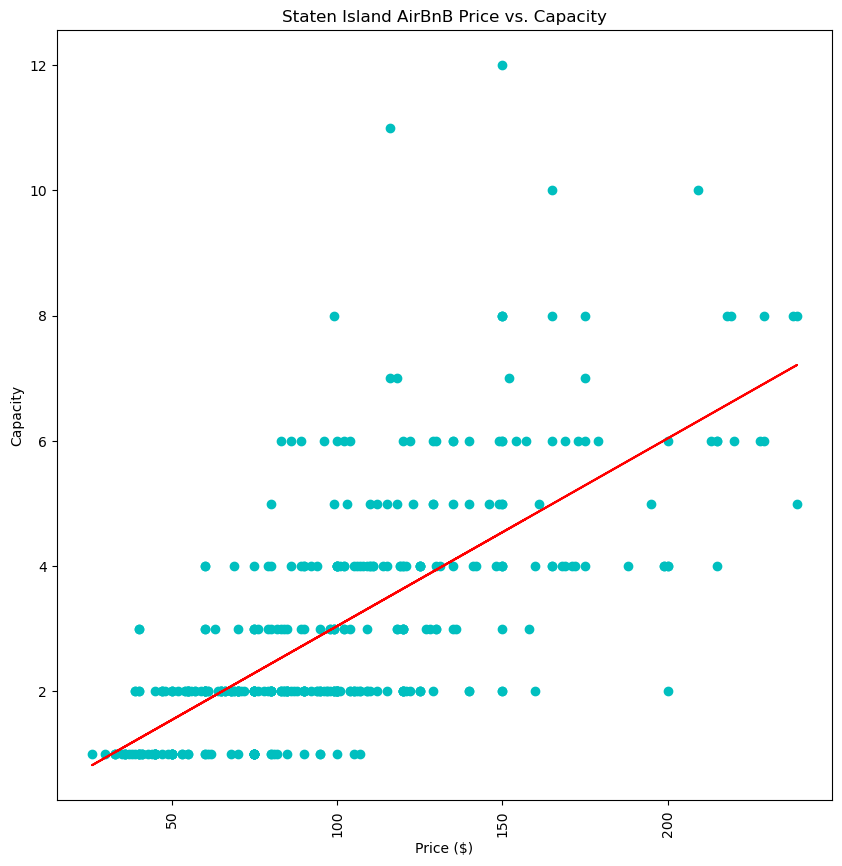

In [87]:
# Scatter plot of Price vs. Capacity in Staten Island where priced is capped at $245.00 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] <= 245]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(staten_x, staten_y, color="c")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Staten Island AirBnB Price vs. Capacity")

x = staten_x
y = staten_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

# Save the figure
plt.savefig("output_data/StatenIslandScatter.png")

plt.show()

In [88]:
# Summary stats dataframe of capacities by neighborhoods in Staten Island
staten_df["Price"] = staten_df["Price"].astype(float)

hood_mean = staten_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = staten_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = staten_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = staten_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = staten_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_16932\646248237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  staten_df["Price"] = staten_df["Price"].astype(float)


,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Arden Heights,3.000000,3.0,3.333333,1.825742,0.912871
Arrochar,3.000000,2.5,2.727273,1.651446,0.476731
Bull's Head,2.500000,2.5,1.666667,1.290994,0.645497
Castleton Corners,2.500000,2.0,1.500000,1.224745,0.500000
"Chelsea, Staten Island",3.000000,3.0,2.000000,1.414214,1.000000
Clifton,3.100000,2.0,3.655556,1.911951,0.604612
Concord,2.875000,3.0,1.553571,1.246423,0.440677
Dongan Hills,5.000000,6.0,4.800000,2.190890,0.894427
Eltingville,3.750000,4.0,0.250000,0.500000,0.250000


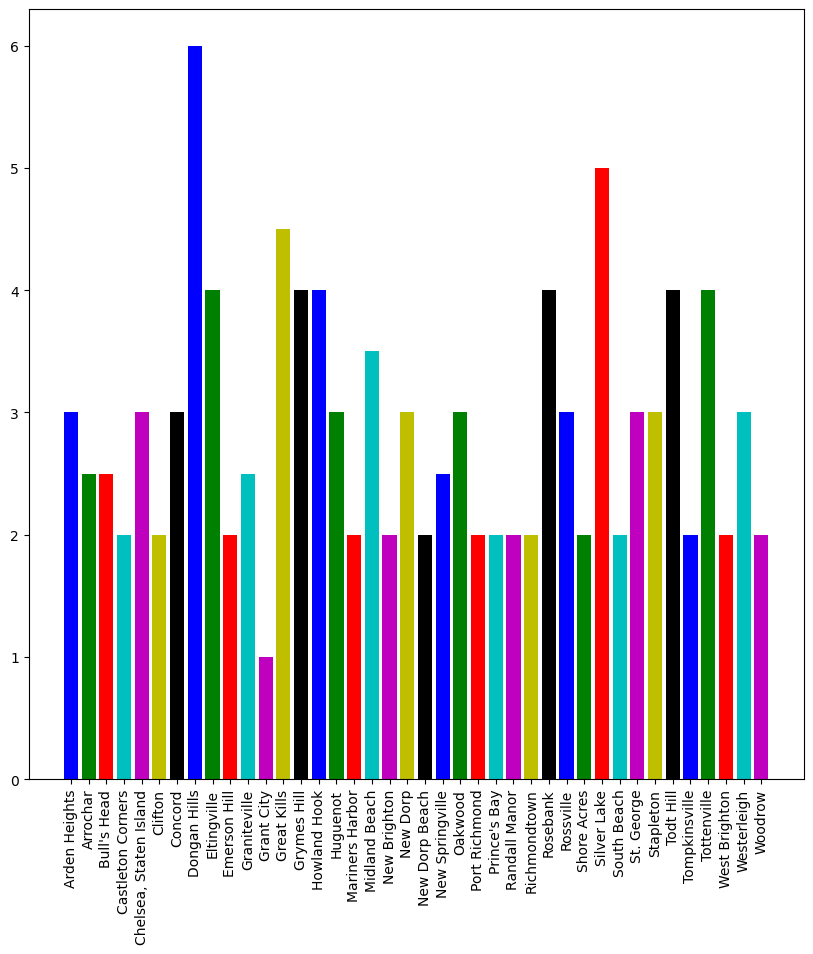

In [89]:
# Bar chart showing median unit capacities by neighborhood in Staten Island
hood_list = hood_stats.index.unique()
plt.figure(figsize=(10,10))
plt.bar(hood_list, hood_stats["Median Capacity"], color=colors)
plt.xticks(rotation=90)

# Save the figure
#plt.savefig("output_data/StatenIslandCapacitiesBar.png")

plt.show()

In [90]:
# Summary stats dataframe for every neighborhood just for fun
size_df["Price"] = size_df["Price"].astype(float)

hood_mean = size_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = size_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = size_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = size_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = size_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Price":hood_mean["Price"], "Median Price":hood_med["Price"], "Price Variance":hood_var["Price"],
                                "Price Std Dev":hood_std["Price"], "Price Std Err":hood_sem["Price"]})

hood_stats

,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Neighborhood,,,,,
Allerton,121.547170,99.0,9148.906386,95.649916,13.138526
Arden Heights,89.750000,95.0,1452.916667,38.117144,19.058572
Arrochar,129.214286,104.5,6947.258242,83.350214,22.276282
Arverne,191.406780,132.0,32553.200637,180.425055,16.609473
Astoria,111.283093,85.0,8773.108730,93.664875,3.390896
...,...,...,...,...,...
Windsor Terrace,167.621622,139.0,17682.364619,132.975053,12.621433
Woodhaven,89.865979,72.0,3385.950601,58.188922,5.908190
Woodlawn,127.500000,88.5,9395.961538,96.932768,25.906372
